In [34]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from cc_gr import cc_visited, largest_cc_size, compute_resilience, random_order
from graph_gen import algo_er, algo_upa
from graph_degree import compute_in_degrees, in_degree_distribution
from utils import copy_graph, delete_node

In [35]:
def graph_summary(graph):
    """Helper function that gives out statistics of a graph network"""
    deg = compute_in_degrees(graph)
    sr = pd.Series(deg)

    num_nodes = sr.count()
    num_edges = sr.sum()/2  # undirected
    print 'Number of nodes', num_nodes
    print 'Number of unqiue edges', num_edges
    print 'Avg unique edges/node {:0.2f}'.format(num_edges / float(num_nodes))

    # ax = sr.value_counts(normalize=True).plot(logx=False, linestyle='', marker='.', markersize=7)
    ax = sr.hist(bins=25)
    plt.show()
    return num_nodes, num_edges


# Summary & Q1, 2

Number of nodes 1239
Number of unqiue edges 3047
Avg unique edges/node 2.46


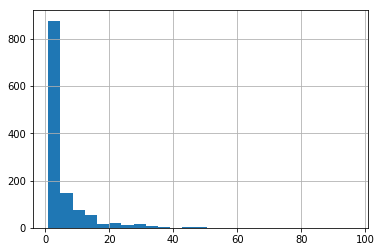

In [36]:
# read in the undirected computer network graph
fileobj = open('data/alg_rf7.txt')
graph = {}

for line in fileobj.readlines():
    lst = line.split()
    graph[int(lst[0])] = set(int(item) for item in lst[1:])

num_nodes, num_edges = graph_summary(graph)

Number of nodes 1239
Number of unqiue edges 3045
Avg unique edges/node 2.46


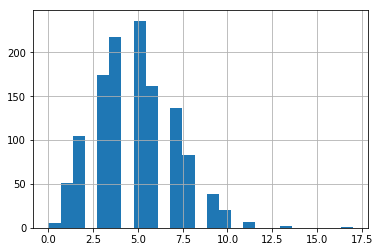

(1239, 3045)

In [37]:
# generate ER undirected graph based on actual graph's statistics
p = (float(num_edges)/num_nodes) / num_nodes * 2
random.seed(hash('Computer Network Attacks'))
er_graph = algo_er(num_nodes, p)

graph_summary(er_graph)

Number of nodes 1239
Number of unqiue edges 3684
Avg unique edges/node 2.97


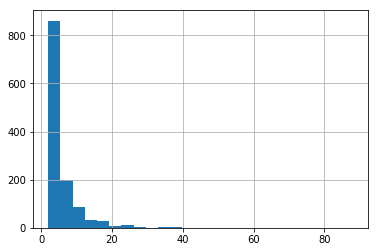

(1239, 3684)

In [38]:
# generate UPA graph based on actual graph's stats
m = 3
random.seed(hash('Computer Network Attacks'))
upa_graph = algo_upa(num_nodes, m)

graph_summary(upa_graph)

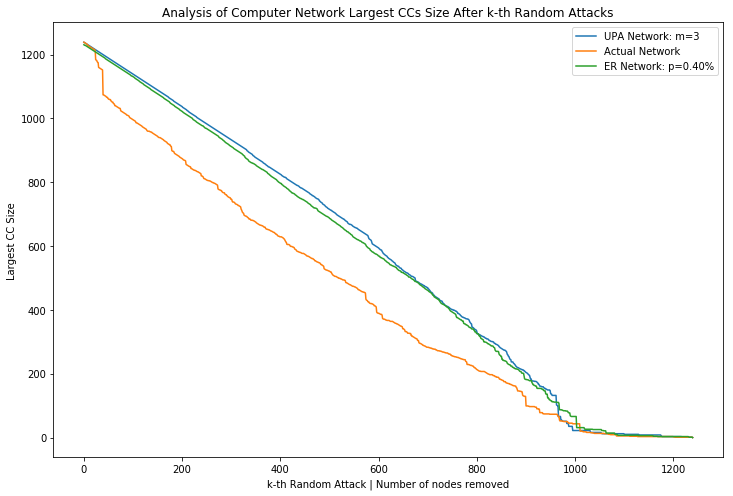

In [41]:
data = {
    'actual': {'graph': graph, 'legend': 'Actual Network'},
    'er': {'graph': er_graph, 'legend': 'ER Network: p={:0.2f}%'.format(p*100)},
    'upa': {'graph': upa_graph, 'legend': 'UPA Network: m={}'.format(m)},
}
random.seed(hash('Computer Network Attacks'))

plt.figure(figsize=(12,8))
for _, v in data.items():
    _graph = v['graph']
    attacks = random_order(_graph)
    res = compute_resilience(_graph, attacks)
    v['res'] = res
    plt.plot(res, label=v['legend'])

plt.ylabel('Largest CC Size')
plt.xlabel('k-th Random Attack | Number of nodes removed')
plt.title('Analysis of Computer Network Largest CCs Size After k-th Random Attacks')
plt.legend()
plt.show()

Q2: Both UPA and ER networks stand well after taking down 20% of nodes. In contrast, the computer network's largest CC size dropped sharply after taking down 5% of nodes. Although it is still within the 25% threshold, the drop is significant.

# Targeted Attackes, Q3 +

In [31]:
import time, random
import pandas as pd
import matplotlib.pyplot as plt
from graph_gen import algo_upa
from cc_gr import targeted_order, fast_targeted_order

random.seed(1209242)
data = []
for n in range(10, 1001, 10):
    graph = algo_upa(n, 5)

    t0 = time.time()
    _ = targeted_order(graph)
    t1 = time.time()
    to_time = (t1 - t0)

    t0 = time.time()
    _ = fast_targeted_order(graph)
    t1 = time.time()
    fto_time = (t1 - t0)

    data.append((n, to_time, fto_time))

df = pd.DataFrame(data, columns=['num_nodes', 'TO', 'FTO']).set_index('num_nodes')

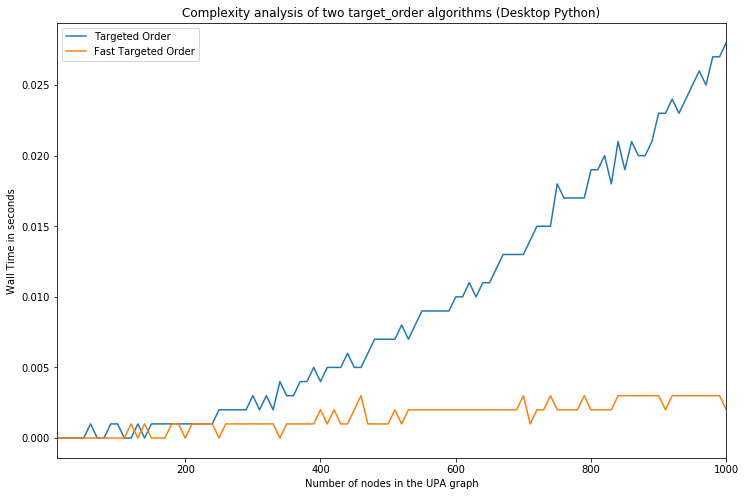

In [32]:
plt.figure(figsize=(12,8))

df.TO.plot(label='Targeted Order')
df.FTO.plot(label='Fast Targeted Order')

plt.xlabel('Number of nodes in the UPA graph')
plt.ylabel('Wall Time in seconds')
plt.title('Complexity analysis of two target_order algorithms (Desktop Python)')
plt.legend()
plt.show()

targeted_order method always O(n**2) running time.

fast_targeted_order has running time around O(n+m) running time. In UPA(m=5), the total edges are around 5n, thus the running time ends with linear O(6n) which is much better then O(n**2). But when given a fully connected graph, fast_targeted_order method is actually slower.

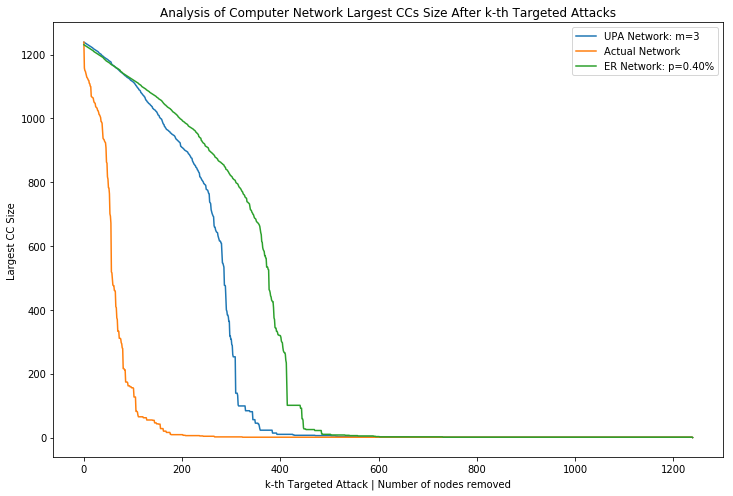

In [42]:
data = {
    'actual': {'graph': graph, 'legend': 'Actual Network'},
    'er': {'graph': er_graph, 'legend': 'ER Network: p={:0.2f}%'.format(p*100)},
    'upa': {'graph': upa_graph, 'legend': 'UPA Network: m={}'.format(m)},
}
random.seed(hash('Computer Network Attacks'))

plt.figure(figsize=(12,8))
for _, v in data.items():
    _graph = v['graph']
    attacks = fast_targeted_order(_graph)
    res = compute_resilience(_graph, attacks)
    v['res'] = res
    plt.plot(res, label=v['legend'])

plt.ylabel('Largest CC Size')
plt.xlabel('k-th Targeted Attack | Number of nodes removed')
plt.title('Analysis of Computer Network Largest CCs Size After k-th Targeted Attacks')
plt.legend()
plt.show()

Q5: Targeted attacks are devastating. However, the fully randomized ER graph holds up quite well. In contrast, The computer network lost nearly 100% of its size before 20% of attacks. UPA network also holds up fine, right on the 25% margin threshold.

Q6: I don't think so. There are lots more that goes into computer network design. For example, different architecture has different costs. Although, in theory, a fully randomized network does perform well against targeted attacks.